In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
os.chdir(r"C:\Users\Pranjali\Downloads")
file = 'india-india-village-level-geospatial-socio-econ-1991-2001-gj-2001-shp.zip'
with ZipFile(file, 'r') as zip:
    zip.extract('india-village-census-2001-GJ.shp')
    gdf = gpd.read_file('india-village-census-2001-GJ.shp')
#$SHAPE_RESTORE_SHX=YES fio info india-village-census-2001-GJ.shp

In [2]:
district = gdf[['DISTRICT', 'geometry']]
districts = gdf.dissolve(by='DISTRICT', aggfunc = 'mean')


In [3]:
import xarray as xr
from netCDF4 import Dataset
import os
os.chdir(r"C:\Users\Pranjali\Downloads")
rl2 = xr.open_dataset("ds1p.nc")

In [4]:
rl3 = xr.open_dataset("ds3p.nc")
rl1 = xr.open_dataset("dsp.nc")
rl5 = xr.open_dataset("ds5p.nc")

In [9]:
import numpy as np

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.path as mpltPath
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

cube=rl2['rlv2']
cube1=rl3['rlv3']
cube2=rl5['rlv5']
cube3=rl1['rlv1']
lats=rl2.lat1.values
lons=rl2.lon1.values


[lon2d,lat2d]=np.meshgrid(lons,lats)


points=[]

for latit in range(117):
    for lonit in range(115):
        point=(lon2d[latit,lonit],lat2d[latit,lonit])
        points.append(point)

points=np.array(points)

fld=np.squeeze(cube.data)
fld1=np.squeeze(cube1.data)
fld2=np.squeeze(cube2.data)
fld3=np.squeeze(cube3.data)
mask=np.zeros_like(fld)
mask1=np.zeros_like(fld1)
mask2=np.zeros_like(fld2)
mask3=np.zeros_like(fld3)

Canada=gpd.read_file(r"C:\Users\Pranjali\Downloads\maps-master\maps-master\States\Admin2.shp")
BritishColumbia=Canada[Canada['ST_NM'] == 'Gujarat']

def explode_polygon(indata):
    indf = indata
    outdf = gpd.GeoDataFrame(columns=indf.columns)
    for idx, row in indf.iterrows():
        if type(row.geometry) == Polygon:

            outdf = outdf.append(row,ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indf.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row]*recs,ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom,'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf,ignore_index=True)
    return outdf


EBritishColumbia=explode_polygon(BritishColumbia)



for index,row in EBritishColumbia.iterrows():

   
    mypolygon=[]
    for pt in list(row['geometry'].exterior.coords):
      
        mypolygon.append(pt)


    path=mpltPath.Path(mypolygon)
    inside=path.contains_points(points)

    inside=np.array(inside).reshape(lon2d.shape)
    i=np.where(inside == True)
    mask[i]=1
    mask1[i]=1
    mask2[i]=1
    mask3[i]=1
i=np.where(mask == 0)
fld[i]=np.nan
fld1[i]=np.nan
fld2[i]=np.nan
fld3[i]=np.nan

In [217]:
f=fld[~np.isnan(fld)]
BritishColumbia

,ST_NM,geometry
9,Gujarat,(POLYGON ((71.70375251096965 20.99958229049037...


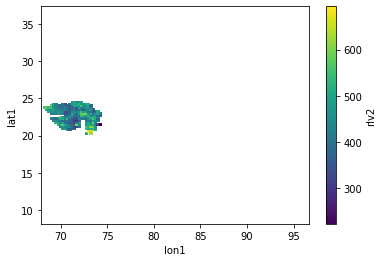

In [81]:
masking = rl2['rlv2']*fld
masking.values = masking.values/fld
masking.plot()
#masking.to_netcdf(r"C:\Users\Pranjali\Downloads\gujmask.nc")

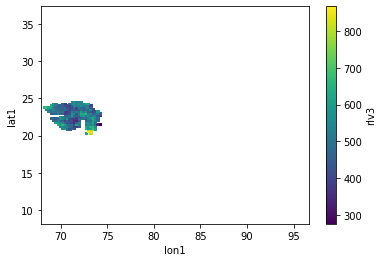

In [11]:
masking1=rl3['rlv3']*fld1
masking1.values = masking1.values/fld1
masking1.plot()

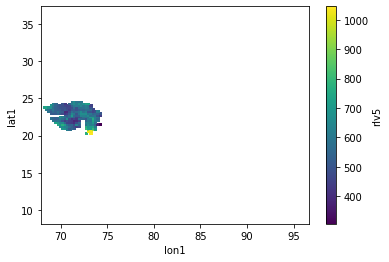

In [12]:
masking2=rl5['rlv5']*fld2
masking2.values = masking2.values/fld2
masking2.plot()

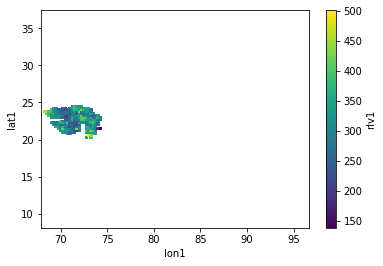

In [13]:
masking3=rl1['rlv1']*fld3
masking3.values = masking3.values/fld3
masking3.plot()

In [82]:
m0 = masking.values[~np.isnan(masking.values)]
m1 = masking1.values[~np.isnan(masking1.values)]
m2 = masking2.values[~np.isnan(masking2.values)]
m3 = masking3.values[~np.isnan(masking3.values)]

In [276]:
len(m0)

262

In [15]:
ll=[]
for i in range(117):
    for j in range(115):
        if(np.isnan(masking.values[i][j])== False):
            ll.append((rl2.lat1.values[i],rl2.lon1.values[j]))   


In [274]:
len(m1)

262

In [32]:
r = xr.open_dataset("gujmask.nc")
l=[]
r11 = r['rlv2']
for i in range(117):
    for j in range(115):
        if(np.isnan(r11[i][j])==False):
            l.append((r.lat1.values[i],r.lon1.values[j]))

In [33]:
lati= []
long=[]
for i in range(len(l)):
    lati.append(l[i][0])
    long.append(l[i][1])

In [267]:
list(districts.columns.values)

['geometry',
 'UID',
 'CENSUS_COD',
 'STATE',
 'SUB_DIST',
 'TOWN_VILL',
 'WARD',
 'EB',
 'No_HH',
 'TOT_P',
 'TOT_M',
 'TOT_F',
 'P_06',
 'M_06',
 'F_06',
 'P_SC',
 'M_SC',
 'F_SC',
 'P_ST',
 'M_ST',
 'F_ST',
 'P_LIT',
 'M_LIT',
 'F_LIT',
 'P_ILL',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_P',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_P',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_P',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_P',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_P',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_P',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_P',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_P',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_P',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_P',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_P',
 'MARG_OT_M',
 'MARG_OT_F',
 'NON_WORK_P',
 'NON_WORK_M',
 'NON_WORK_F',
 'ST_CODE',
 'DIST_CODE',
 'THSIL_CODE',
 'BLOCK_CODE',
 'V_CT_CODE',
 'AREA',
 'T_HH',
 'T_P',
 'T_M',
 'T_F',
 'SC_P',
 'SC_M',
 'SC_F',
 'ST_P',
 'ST_M',
 'ST_F',
 'EDU_FAC',
 'P_SCH',
 'RANG_P_SCH',
 'M_SCH',
 

In [66]:
#Sensitivity indicators

In [4]:
#Total population
popln = []
pindex = []
for i in range(1,26):
    popln.append(districts['TOT_P'][i])
for i in range(25):
    index = (popln[i]-min(popln))/(max(popln)-min(popln))
    pindex.append(index)

In [5]:
#tribal population
scst = []
scstindex = []
for i in range(1,26):
    scst.append((districts['SC_P'][i]+districts['ST_P'][i]))
for i in range(25):
    index = (scst[i]-min(scst))/(max(scst)-min(scst))
    scstindex.append(index)

In [6]:
#tribal female
scstf = []
scstfindex = []
for i in range(1,26):
    scstf.append((districts['SC_F'][i]+districts['ST_F'][i]))
for i in range(25):
    index = (scstf[i]-min(scstf))/(max(scstf)-min(scstf))
    scstfindex.append(index)


In [7]:
#infants population
infants = []
infindex = []
for i in range(1,26):
    infants.append((districts['P_06'][i]))
for i in range(25):
    index = (infants[i]-min(infants))/(max(infants)-min(infants))
    infindex.append(index)


In [8]:
#Irrigated area
irra = []
irrindex = []
for i in range(1,26):
    irra.append((districts['TOT_IRR'][i]))
for i in range(25):
    index = (irra[i]-min(irra))/(max(irra)-min(irra))
    irrindex.append(index)

In [9]:
#Unirrigated area
unirra = []
unirrindex = []
for i in range(1,26):
    unirra.append((districts['UN_IRR'][i]))
for i in range(25):
    index = (unirra[i]-min(unirra))/(max(unirra)-min(unirra))
    unirrindex.append(index)

In [10]:
#distance from town
distance = []
distindex = []
for i in range(1,26):
    distance.append((districts['DIST_TOWN'][i]))
for i in range(25):
    index = (distance[i]-min(distance))/(max(distance)-min(distance))
    distindex.append(index)

In [ ]:
#Adaptive capacity indicators

In [11]:
#Electricity used in agriculture
power = []
powerindex = []
for i in range(1,26):
    power.append((districts['POWER_AGR'][i]))
for i in range(25):
    index = (power[i]-min(power))/(max(power)-min(power))
    powerindex.append(index)

In [12]:
#income
inc =[]
incindex=[]
for i in range(1,26):
    inc.append((districts['TOT_INC'][i]))
for i in range(25):
    index = (inc[i]-min(inc))/(max(inc)-min(inc))
    incindex.append(index)

In [13]:
#medical facilities(no.of hospitals and dispensaries)
hosp =[]
hospindex=[]
for i in range(1,26):
    hosp.append((districts['ALL_HOSP'][i]+districts['AYU_HOSP'][i]+districts['UN_HOSP'][i]+districts['HOM_HOSP'][i]+districts['ALL_DISP'][i]+districts['AYU_DISP'][i]+districts['UN_DISP'][i]+districts['HOM_DISP'][i]))
for i in range(25):
    index = (hosp[i]-min(hosp))/(max(hosp)-min(hosp))
    hospindex.append(index)

In [14]:
#no. of private doctors
pdr =[]
pdrindex=[]
for i in range(1,26):
    pdr.append((districts['RMP'][i]))
for i in range(25):
    index = (pdr[i]-min(pdr))/(max(pdr)-min(pdr))
    pdrindex.append(index)

In [15]:
#no. of subsided dr.
sdr =[]
sdrindex=[]
for i in range(1,26):
    sdr.append((districts['SMP'][i]))
for i in range(25):
    index = (sdr[i]-min(sdr))/(max(sdr)-min(sdr))
    sdrindex.append(index)

In [16]:
#main workers
aworker =[]
aworkindex=[]
for i in range(1,26):
    aworker.append((districts['MAIN_AL_P'][i]))
for i in range(25):
    index = (aworker[i]-min(aworker))/(max(aworker)-min(aworker))
    aworkindex.append(index)

In [17]:
#marginal workers
mworker =[]
mworkindex=[]
for i in range(1,26):
    mworker.append((districts['MARG_AL_P'][i]))
for i in range(25):
    index = (mworker[i]-min(mworker))/(max(mworker)-min(mworker))
    mworkindex.append(index)

In [18]:
latd=[24,24.34,23.52,23.42,23.84,23.215,23.03,22.43,22.18,22.27,21.37,21.31,21.36,21.46,22.32,22.45,22.80,22.53,22.00,21.87,21.41,21.26,20.82,21.07,20.5992]
lond=[70,71.76,72.1,72.37,72.99,72.63,72.4,71.43,70.56,70.07,69.49,70.36,71.15,72.11,73,72.45,73.55,74.19,73.16,73.55,73.01,72.99,73.70,73.40,72.9342]

In [37]:
len(lond)

25

In [53]:
p01=[]
p11=[]
p22=[]
p33=[]

for i in range(len(latd)):
    for j in range(len(ll)):
        p= (1/(np.sqrt((latd[i]-ll[j][0])**2+(lond[i]-ll[j][1])**2)))#*m0[j]
        p1= (1/(np.sqrt((latd[i]-ll[j][0])**2+(lond[i]-ll[j][1])**2)))#*m1[j]
        p2= (1/(np.sqrt((latd[i]-ll[j][0])**2+(lond[i]-ll[j][1])**2)))#*m2[j]
        p3=(1/(np.sqrt((latd[i]-ll[j][0])**2+(lond[i]-ll[j][1])**2)))#*m3[j]
        
        p01.append(p)
        p11.append(p1)
        p22.append(p2)
        p33.append(p3)

C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [54]:
p01[230]=0
p22[230]=0
p33[230]=0
p11[230]=0
sp=0
sp1=0
sp2=0
sp3=0
pf=[]

for i in range(0,6550,262):
    for j in range(262):
        sp= sp+p01[i:i+262][j]
        sp1= sp1+p11[i:i+262][j]
        sp2= sp2+p22[i:i+262][j]
        sp3= sp3+p33[i:i+262][j]
    pf.append((sp,sp1,sp2,sp3))

In [55]:
s=0
s1=0
s2=0
s3=0
s01=[]

for i in range(0,6550,262):
    for j in range(262):
            s = s+(p01[i:i+262][j]*m0[j])
            s1=s1+(p11[i:i+262][j]*m1[j])
            s2=s2+(p22[i:i+262][j]*m2[j])
            s3=s3+(p33[i:i+262][j]*m3[j])
    s01.append((s,s1,s2,s3))

In [84]:
rlf=[]
for i in range(len(s01)):
    rlf.append((s01[i][0]/pf[i][0],s01[i][1]/pf[i][1],s01[i][2]/pf[i][2],s01[i][3]/pf[i][3]))

In [57]:
rlf2=[]
rlf3=[]
rlf5=[]
rlf1=[]
rind=[]
for i in range(25):
    rlf2.append(rlf[i][0])
    rlf3.append(rlf[i][1])
    rlf5.append(rlf[i][2])
    rlf1.append(rlf[i][3])
for i in range(25):
    rind.append(((rlf1[i]-min(rlf1))/(max(rlf1)-min(rlf1)),(rlf2[i]-min(rlf2))/(max(rlf2)-min(rlf2)),(rlf3[i]-min(rlf3))/(max(rlf3)-min(rlf3)),(rlf5[i]-min(rlf5))/(max(rlf5)-min(rlf5))))
    

In [ ]:
#Vulnerability = Exposure +sensitivity - adaptive capacity
#Exposure = 0.33(0.25 r1index+ 0.25 r2index+ 0.25 r3index+ 0.25 r5index)
#sensitivity = 0.33(0.33((t+i/T)*total p +(0.5 - t/T)*tribal +(0.5-i/T)*infants)+ 0.33* unirrigation + 0.33*dist from town)
#Adaptive capacity = 0.33(0.25(0.5*power+0.5*irr)+0.25 inc+ 0.25*(0.5*no. of hosp+ 0.5((s/p+s)*s+(p/p+s)*p)+0.25workers)

In [26]:
import pandas as pd
ex = pd.read_excel( r"D:\rlindex-1970-2001-pb.xlsx")

In [20]:
#exposure
e=[]
for i in range(25):
    e.append(0.33*(0.25*ex['r1index'][i] + 0.25*ex['r2index'][i] + 0.25*ex['r3index'][i] + 0.25*ex['r5index'][i]))
e1=[0]
for i in range(25):
    e1.append(e[i])

In [20]:
print(e1)

[0, 0.0, 0.12830163610779846, 0.13673480911022085, 0.1523434537106496, 0.1965248468588622, 0.19322202515084155, 0.18208430420780455, 0.17019049850003326, 0.15250537634796937, 0.14849853826522472, 0.15087781852230417, 0.16110527853307405, 0.16835048269954428, 0.1764031860958933, 0.19624700427352845, 0.1996748352653946, 0.21511637128129293, 0.2206032612727312, 0.23621396023644423, 0.24419316383223547, 0.26043715877472623, 0.2921339323315317, 0.3052146320568934, 0.31847188558495687, 0.33]


In [21]:
E1=[]
for i in range(25):
    E1.append(0.33*(0.25*rind[i][0] + 0.25*rind[i][1] + 0.25*rind[i][2] + 0.25*rind[i][3]))
E=[0]
for i in range(25):
    E.append(E1[i])
print(E)

NameError: name 'rind' is not defined

In [21]:
import pandas as pd
exposure = pd.DataFrame({'exposure':E})
exposure.to_excel( r"C:\Users\Pranjali\Downloads\Exposure.xlsx")

NameError: name 'E' is not defined

In [23]:
import pandas as pd
expo = pd.read_excel(r"D:\All project data\rlindex-1951-1980-gj.xlsx")
E2=0.33*0.25*(expo['r1index']+expo['r2index']+expo['r3index']+expo['r5index'])

In [24]:
E21=[0]
for i in range(25):
    E21.append(E2[i])

In [108]:
import pandas as pd
expo1 = pd.read_excel(r"D:\difference-expo-guj.xlsx")
E3 = 0.33*0.25*(expo1['r1index']+expo1['r2index']+expo1['r3index']+expo1['r5index'])

In [109]:
E31=[0]
for i in range(25):
    E31.append(E3[i])

In [92]:
import pandas as pd
expo1 = pd.read_excel( r"D:\futuremodels-expo-guj.xlsx")
E4 = 0.33*0.25*(expo1['r1index']+expo1['r2index']+expo1['r3index']+expo1['r5index'])

In [93]:
E41=[0]
for i in range(25):
    E41.append(E4[i

In [27]:
#sensitivity
pw = []
tw=[]
t1w=[]
fw=[]
iw=[]
pin=[]
t=[]
inf=[]
unirr=[]
d = []
for i in range(len(popln)):
    pw.append(((scst[i]+infants[i])/popln[i]))
    tw.append((0.5-(scst[i]/popln[i])))
    t1w.append(scstf[i]/scst[i])
    fw.append((1-(scstf[i]/scst[i])))
    iw.append((0.5-(infants[i]/popln[i])))
    pin.append(0.33*0.33*(pw[i]*pindex[i]))
    t.append(0.33*0.33*(tw[i]*(t1w[i]*scstindex[i]+fw[i]*scstfindex[i])))
    inf.append(0.33*0.33*(iw[i]*infindex[i]))
    unirr.append(0.33*0.33*unirrindex[i])
    d.append(0.33*0.33*distindex[i])
    

In [28]:
S=[]
for i in range(25):
    S.append(pin[i]+t[i]+inf[i]+unirr[i]+d[i])
S1=[0]
for i in range(25):
    S1.append(S[i])

In [29]:
#adaptive capacity
a=[]
income=[]
m=[]
w=[]
for i in range(25):
    a.append(0.33*0.25*powerindex[i])
    income.append(0.33*0.25*incindex[i])
    if(sdr[i]>=pdr[i]):
        m.append(0.33*0.25*(0.5*hospindex[i]+0.5*(sdr[i]/(sdr[i]+pdr[i]))*sdrindex[i]+0.5*(pdr[i]/(sdr[i]+pdr[i]))*pdrindex[i]))
    else:
        m.append(0.33*0.25*(0.5*hospindex[i]+0.5*(pdr[i]/(sdr[i]+pdr[i]))*sdrindex[i]+0.5*(sdr[i]/(sdr[i]+pdr[i]))*pdrindex[i]))
    if(aworker[i]>=mworker[i]):
        w.append(0.33*0.25*((aworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(mworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))
    else:
        w.append(0.33*0.25*((mworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(aworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))

In [30]:
A=[]
for i in range(25):
    A.append(a[i]+income[i]+m[i]+w[i])
A1=[0]
for i in range(25):
    A1.append(A[i])

In [42]:
A1

[0,
 0.04044707661012047,
 0.10957748751954606,
 0.06265131939340327,
 0.06887702460094572,
 0.1051228261746672,
 0.17472995298308186,
 0.0979057477017301,
 0.03526315097157177,
 0.08650881979460127,
 0.031170052534186532,
 0.029454076873159606,
 0.046071453254344835,
 0.11864254990707049,
 0.11466414129220787,
 0.15427212615969577,
 0.12302486398645307,
 0.06677943696726155,
 0.039735103007732794,
 0.1788306046532019,
 0.027949589952018607,
 0.07641882446227423,
 0.10746004930339559,
 0.06861233619738637,
 0.08646059349143553,
 0.0704877881464141]

In [31]:
v=[]
for i in range(26):
    v.append(e1[i]+S1[i]-A1[i])
for i in range(26):
    if(v[i]<0):
        v[i]=0

In [32]:
v1=[]
for i in range(26):
    v1.append(E21[i]+S1[i]-A1[i])


In [33]:
v2=[]
for i in range(26):
    v2.append(E41[i]+S1[i]-A1[i])


NameError: name 'E41' is not defined

In [66]:
districts.to_file(driver = 'ESRI Shapefile', filename= r"C:\Users\Pranjali\Downloads\districts1.shp")


In [27]:
import geopandas as gpd
districts["vindex"]=v
d = districts[['vindex','geometry']]


In [167]:
latd=[24,24.34,23.52,23.42,23.84,23.21,23.03,22.43,22.18,22.17,21.37,21.31,21.36,21.46,22.32,22.45,22.80,22.53,22.00,21.87,21.41,21.26,20.82,21.07,20.59]
lond=[70,71.76,72.10,72.37,72.99,72.63,72.40,71.43,70.56,70.07,69.49,70.36,71.15,72.11,73.00,72.45,73.55,74.19,73.16,73.55,73.01,72.99,73.70,73.40,72.93]
ld=[]
for i in range(len(latd)):
    ld.append((latd[i],lond[i]))
    

In [71]:
rlf2=[0]
rlf3=[0]
rlf5=[0]
rlf1=[0]
rind=[0]
for i in range(25):
    rlf2.append(rlf[i][0])
    rlf3.append(rlf[i][1])
    rlf5.append(rlf[i][2])
    rlf1.append(rlf[i][3])
for i in range(25):
    rind.append(((rlf1[i]-min(rlf1))/(max(rlf1)-min(rlf1)),(rlf2[i]-min(rlf2))/(max(rlf2)-min(rlf2)),(rlf3[i]-min(rlf3))/(max(rlf3)-min(rlf3)),(rlf5[i]-min(rlf5))/(max(rlf5)-min(rlf5))))
    

In [35]:
districts['Aindex']=A1

In [38]:
districts['code']=[i for i in range(26)]

In [39]:
#districts['Eindex70-01']=e1
dist = districts[['code','Aindex']]
data_for_map = dist.rename(index=str, columns={'code':'C','Aindex':'expo'})
merged = districts.set_index('code').join(data_for_map.set_index('C'))

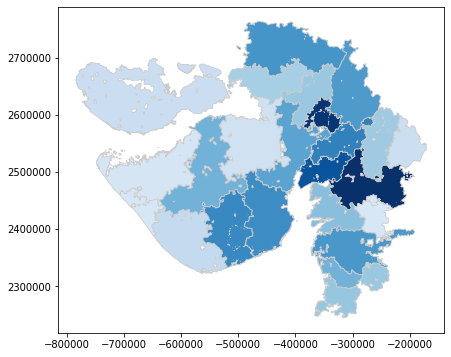

In [40]:
variable = 'Aindex'
# set the range for the choropleth
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))                                                                                 
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [41]:
(max(A1))

0.1788306046532019

In [43]:
ax.axis('off')
# add a title
ax.set_title('Adaptability for 2001 census', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=0.20))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\2001 A.png', dpi=300)

In [38]:
districts['S']=S1
dist = districts[['code','S']]
data_for_map = dist.rename(index=str, columns={'code':'C','S':'se'})
merged = districts.set_index('TOT_P').join(data_for_map.set_index('C'))

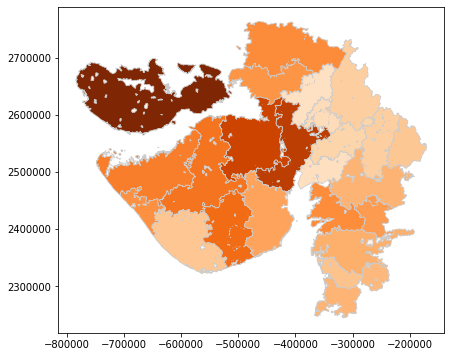

In [39]:
variable = 'S'
# set the range for the choropleth
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))                                                                                 
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')


In [96]:
districts['vindexfut']=v2
dist = districts[['code','vindexfut']]
data_for_map = dist.rename(index=str, columns={'code':'C','vindexfut':'vulnerability'})
merged = districts.set_index('code').join(data_for_map.set_index('C'))

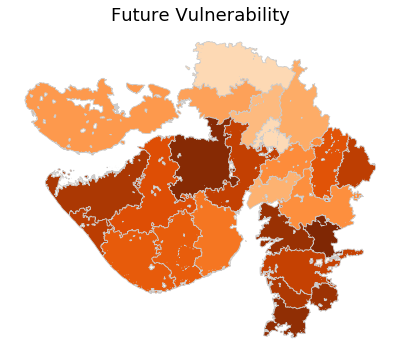

In [120]:
variable = 'vindexfut'
# set the range for the choropleth
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# add a title
ax.set_title('Future Vulnerability', fontdict={'fontsize': '18', 'fontweight' : '3'})
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')


In [40]:
ax.axis('off')
# add a title
ax.set_title('Sensitivity for census 2001', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=0.35))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\S2001.png', dpi=300)

In [107]:
E21

[0,
 0.0,
 0.0,
 0.08324415201446506,
 0.11912525871266694,
 0.1592994529724404,
 0.19193220393596241,
 0.21562634996233257,
 0.22498827580212738,
 0.22182184941506725,
 0.2328264313420437,
 0.24033881303389582,
 0.24367319659890788,
 0.2614312658300419,
 0.266319101058872,
 0.25747703867212773,
 0.271301610881441,
 0.2719905982257029,
 0.2822739583466633,
 0.2878552095059003,
 0.29745385994722107,
 0.3016597980948264,
 0.3075535890578531,
 0.3082994688458344,
 0.3148658642027774,
 0.3226379157978212]

In [44]:
ax.axis('off')
# add a title
ax.set_title('Vulnerability1', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=0.35))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\ratiovindex.png', dpi=300)

C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


In [54]:
popln1=[0]
scst1=[0]
scstf1=[0]
infants1=[0]
unirra1=[0]
distance1=[0]
power1=[0]
irra1=[0]
inc1=[0]
hosp1=[0]
sdr1=[0]
pdr1=[0]
aworker1=[0]
mworker1=[0]
for i in range(25):
    popln1.append(popln[i])
    scst1.append(scst[i])
    scstf1.append(scstf[i])
    infants1.append(infants[i])
    unirra1.append(unirra[i])
    distance1.append(distance[i])
    power1.append(power[i])
    irra1.append(irra[i])
    inc1.append(inc[i])
    hosp1.append(hosp[i])
    sdr1.append(sdr[i])
    pdr1.append(pdr[i])
    aworker1.append(aworker[i])
    mworker1.append(mworker[i])
    

In [58]:
data = pd.DataFrame({'Dist_code':[i for i in range(26)],'tot_p':popln1,'tribal_p':scst1,'tribalf_p':scstf1,'infants_p':infants1,'unirr_a':unirra1,'dist':distance1,'power_agri':power1,'irr_a':irra1,'inc':inc1,'hosp':hosp1,'sdr':sdr1,'pdr':pdr1,'mwork':aworker1,'marg_work':mworker1,'Aindex':A1,'Sindex':S1,'geometry':districts['geometry']})

In [60]:
rural_2001 = gpd.GeoDataFrame(data)

rural_2001['RL100']=expo['r100']
rural_2001['RL30']=expo['r30']
rural_2001['return1index']=expo['r1index']
rural_2001['return2index']=expo['r2index']
rural_2001['return3index']=expo['r3index']
rural_2001['return5index']=expo['r5index']
rural_2001['Eindex1']=E21
rural_2001['Vindex1']=v1



In [62]:
rural_2001.to_file(driver = 'ESRI Shapefile',filename= r"C:\Users\Pranjali\Downloads\rural_2001.shp")